In [7]:
import numpy as np
import h5py

In [15]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [18]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

(600,)
(600, 64, 64, 3)
(600, 64, 64, 3)
number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [11]:
import matplotlib.pyplot as plt


0.6980392156862745


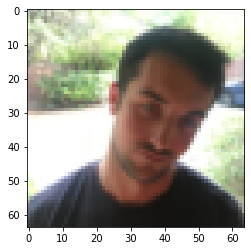

In [21]:
%matplotlib inline
plt.imshow(X_train[0])
print(X_train[0,0,0,0])

In [23]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
# from keras.utils import layer_utils

In [24]:
def model(input_shape):  
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!  
    X_input = Input(input_shape)  

    # Zero-Padding: pads the border of X_input with zeroes  
    X = ZeroPadding2D((3, 3))(X_input)  

    # CONV -> BN -> RELU Block applied to X  
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)  
    X = BatchNormalization(axis = 3, name = 'bn0')(X)  
    X = Activation('relu')(X)  

    # MAXPOOL  
    X = MaxPooling2D((2, 2), name='max_pool')(X)  

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED  
    X = Flatten()(X)  
    X = Dense(1, activation='sigmoid', name='fc')(X)  

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.  
    model = Model(inputs = X_input, outputs = X, name='HappyModel')  

    return model


In [25]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
    X_input = Input(shape=input_shape)
    X = ZeroPadding2D(padding=(1, 1))(X_input)
    X = Conv2D(8, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    X = ZeroPadding2D(padding=(1, 1))(X)
    X = Conv2D(16, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    X = ZeroPadding2D(padding=(1, 1))(X)
    X = Conv2D(32, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    # FC
    X = Flatten()(X)
    Y = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs = X_input, outputs = Y, name='HappyModel')
    ### END CODE HERE ###
    
    return model



In [28]:
happyModel = HappyModel((64, 64, 3))

In [33]:
import keras
import tensorflow as tf
happyModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [34]:
happyModel.fit(x=X_train, y=Y_train, batch_size=16, epochs=20)

Epoch 1/20
38/38 [==============================] - 2s 13ms/step - loss: 0.4543 - accuracy: 0.7983
Epoch 2/20
38/38 [==============================] - 0s 12ms/step - loss: 0.2424 - accuracy: 0.9083
Epoch 3/20
38/38 [==============================] - 0s 12ms/step - loss: 0.1599 - accuracy: 0.9517
Epoch 4/20
38/38 [==============================] - 0s 11ms/step - loss: 0.1114 - accuracy: 0.9617
Epoch 5/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0925 - accuracy: 0.9800
Epoch 6/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0736 - accuracy: 0.9833
Epoch 7/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0586 - accuracy: 0.9883
Epoch 8/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0690 - accuracy: 0.9817
Epoch 9/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0564 - accuracy: 0.9900
Epoch 10/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0447 - accuracy: 0.9867
Epoch 11/

In [35]:
### START CODE HERE ### (1 line)
preds = happyModel.evaluate(x=X_test, y=Y_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 6ms/step - loss: 0.0990 - accuracy: 0.9467

Loss = 0.09897635132074356
Test Accuracy = 0.9466666579246521


In [ ]:
x c